In [58]:
                                                                                                                      
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset has been previously cleaned in previous assignment

In [46]:
    # Load the dataset from the cleaned file
file_path = r"C:\Users\ACER\Documents\BAN6800\cleaned_churn_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to confirm the data is loaded
df.head()

,Region,Account length,Area code,Roaming Plan,Data Plan,Number Data Messages,Total Day Data (MB),Total Day Calls,Total Day Charges (Naira),Total Evening Data (MB),...,Total Night Data (MB),Total Night Calls,Total Night Charges (Naira),Total Roaming Data (MB),Total Roaming Calls,Total Roaming Charges (Naira),Customer Care Calls,Churn (Inactive >30 Days),Mobile Money Transactions,Data Bundle Usage (MB)
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,0,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,0,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,0,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,0,0


In [5]:
# Define the feature columns (X) and target variable (y)
X = df.drop(columns=['Churn (Inactive >30 Days)'])
y = df['Churn (Inactive >30 Days)']


In [7]:
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
X_train.shape, X_test.shape


((2132, 21), (534, 21))

In [9]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled data
X_train_scaled.shape, X_test_scaled.shape


ValueError: could not convert string to float: 'WV'

In [11]:
# Check for categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Region', 'Roaming Plan', 'Data Plan'], dtype='object')


In [13]:
# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Check the shape of the encoded data
X_encoded.head()


,Account length,Area code,Number Data Messages,Total Day Data (MB),Total Day Calls,Total Day Charges (Naira),Total Evening Data (MB),Total Evening Calls,Total Evening Charges (Naira),Total Night Data (MB),...,Region_TX,Region_UT,Region_VA,Region_VT,Region_WA,Region_WI,Region_WV,Region_WY,Roaming Plan_Yes,Data Plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_encoded.loc[X_train.index])
X_test_scaled = scaler.transform(X_encoded.loc[X_test.index])

# Check the shape of the scaled data
X_train_scaled.shape, X_test_scaled.shape


((2132, 70), (534, 70))

In [62]:
# Initialize the RandomForestClassifier model
model = RandomForestClassifier()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

## Model Development: A Random Forest Classifier was chosen because it can effectively handle imbalanced datasets and capture non-linear relationships.


RandomForestClassifier()

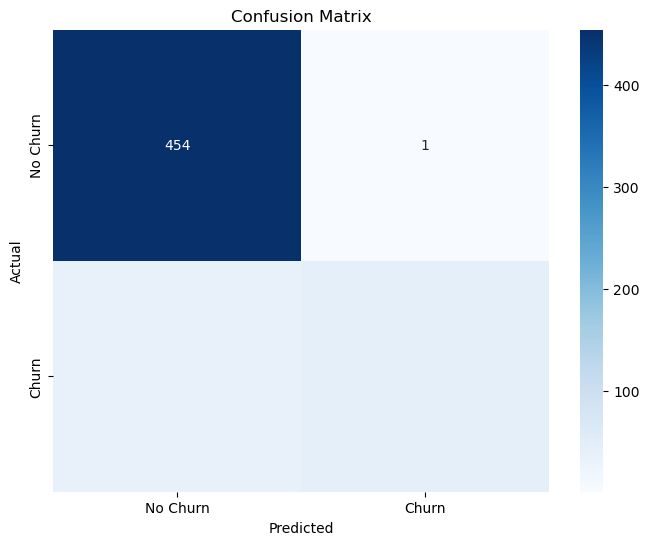

Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       455
        True       0.98      0.54      0.70        79

    accuracy                           0.93       534
   macro avg       0.95      0.77      0.83       534
weighted avg       0.93      0.93      0.92       534



In [64]:
# Make predictions using the trained model
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

## Model Evaluation  
# The model's performance was evaluated using the following metrics:  
# - Accuracy: Measures overall correctness.  
# - Precision: Indicates the proportion of true positives among predicted positives.  
# - Recall: Shows how well the model identifies true positives.  
# - F1-Score: Balances precision and recall.  

# Below, we also visualize feature importance and confusion matrix for better interpretability.


In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [24]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced')

In [26]:
# Predict probabilities for each class
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Adjust decision threshold
y_pred_adjusted = (y_probs > 0.3).astype(int)  # You can experiment with different thresholds


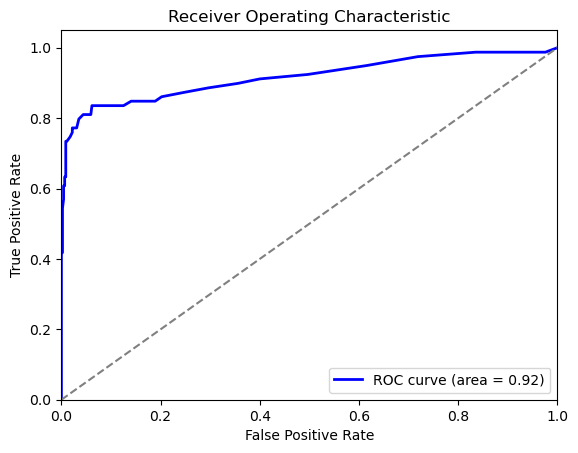

In [28]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [42]:
import joblib
# Save the model
joblib.dump(model, 'churn_prediction_model.pkl')

# If needed, save the scaler for data preprocessing
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [44]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


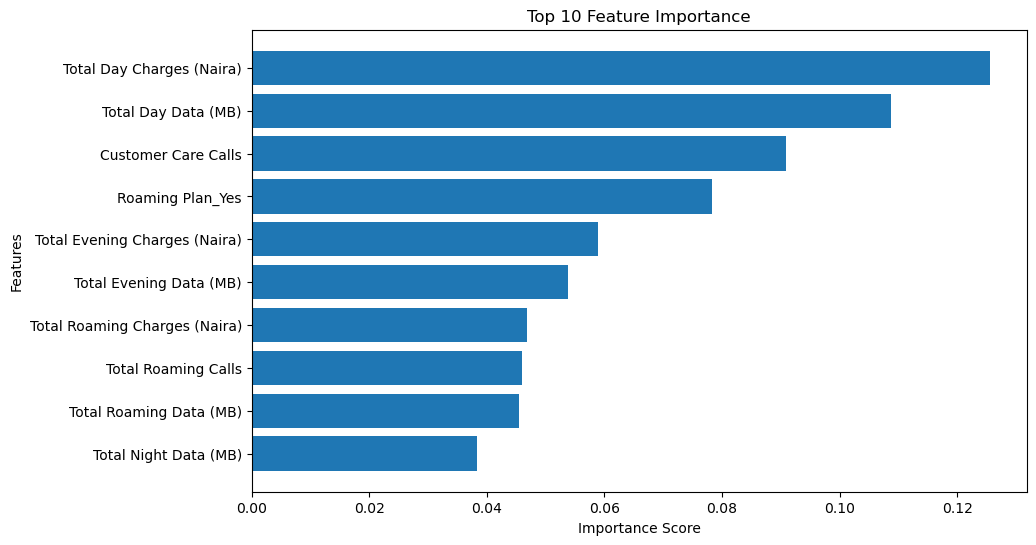

In [68]:
# Feature Importance Visualization (Top 10 Features)
importances = model.feature_importances_
feature_names = X_encoded.columns
sorted_indices = importances.argsort()[-10:]  # Get indices of the top 10 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
